In [ ]:
# Nguyen Huu Quyen - 19522113
# Lab 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Data_Mining/Thuc_hanh/sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",1/1/2018 11:30,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",1/1/2018 11:30,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",1/1/2018 12:14,2.5,2,5.0
3,10001,NaN,1/1/2018 12:14,1.5,1,1.5
4,10001,"""CONE"" Dipped Waffle Cone",1/1/2018 12:14,3.5,1,3.5


In [ ]:
df.shape

(29922, 6)

In [ ]:
df.dtypes

order_id        int64
name           object
ordered_at     object
price         float64
quantity        int64
line_total    float64
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [ ]:
#TODO
df['ordered_at'] = pd.to_datetime(df['ordered_at'])

In [ ]:
#TODO
df['line_total'] = df['line_total'].astype(float)

In [ ]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [ ]:
df[df.duplicated()].shape[0]

538

In [ ]:
# #TODO
df = pd.DataFrame(df)

In [ ]:
# #TODO
df = df.drop_duplicates()

In [ ]:
# #TODO
df = df.dropna()

In [ ]:
# #TODO
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:00,2.5,2,5.0
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:00,3.5,1,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:00,3.0,1,3.0


In [ ]:
df.isnull().sum()

order_id      0
name          0
ordered_at    0
price         0
quantity      0
line_total    0
dtype: int64

In [ ]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total


#### Sanity check for value ranges and to check assumptions

In [ ]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

28

In [ ]:
df[df['line_total'] < 0].shape[0]

279

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [ ]:
# #TODO
df['line_total'] = df['price'] * df['quantity']

In [ ]:
# #TODO
df = df[df['line_total'] >= 0]

In [ ]:
df.describe()

,order_id,price,quantity,line_total
count,27624.000000,27624.000000,27624.000000,27624.000000
mean,14993.783051,2.511711,2.000724,5.028743
std,2888.516649,1.059244,0.819432,3.085410
min,10000.000000,0.500000,1.000000,0.500000
25%,12501.750000,1.500000,1.000000,2.500000
50%,14973.000000,2.500000,2.000000,4.500000
75%,17507.000000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [ ]:
# TODO
import re

df['category'] = df['name'].apply(lambda x: re.search('"(.+?)"', x).group(1))


In [ ]:
#or
#df['category'] = df['name'].str.extract(r'"([^"]+)"')

In [ ]:
# # TODO
df['name'] = df['name'].str.replace('ICE CREAM|SORBET|CONE', "")

<ipython-input-99-d61434f74570>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df['name'].str.replace('ICE CREAM|SORBET|CONE', "")


In [ ]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,""""" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,""""" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,""""" Raspberry",2018-01-01 12:14:00,2.5,2,5.0,SORBET
4,10001,""""" Dipped Waffle Cone",2018-01-01 12:14:00,3.5,1,3.5,CONE
5,10002,""""" Lychee",2018-01-01 12:23:00,3.0,1,3.0,SORBET


#### Analysis, finally!

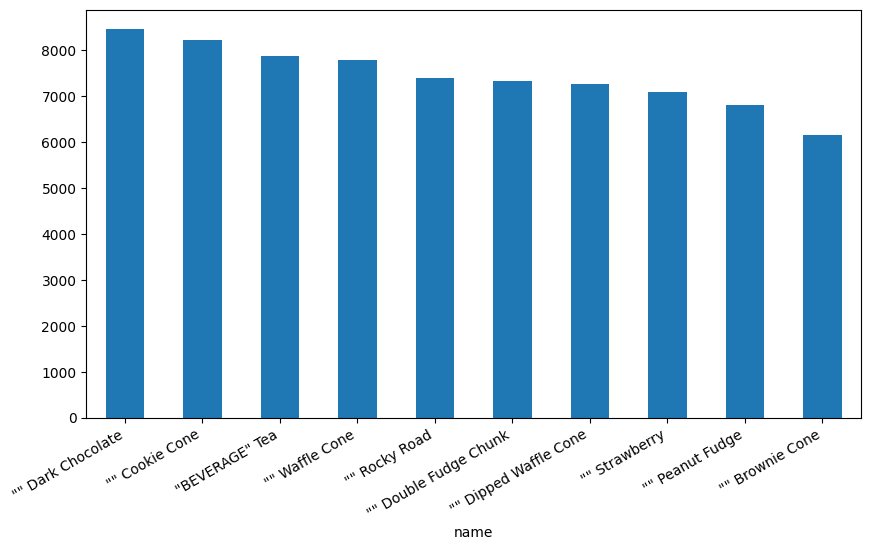

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()